<h1>Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay

<h1>Loading Data and EDA (Exploratory data Analysis)

In [2]:
# loading the csv data to a Pandas DataFrame
df=pd.read_csv('D:\VIT 2022-26\Data Science+Machine Learning\ML MULTI DISEASE\diabetes.csv')

In [3]:
# print first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# print last 5 rows of the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# number of rows and columns in the dataset
df.shape

(768, 9)

In [6]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [9]:
# statistical measures about the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# checking the distribution of Target Variable
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
# Normalized value counts
df.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

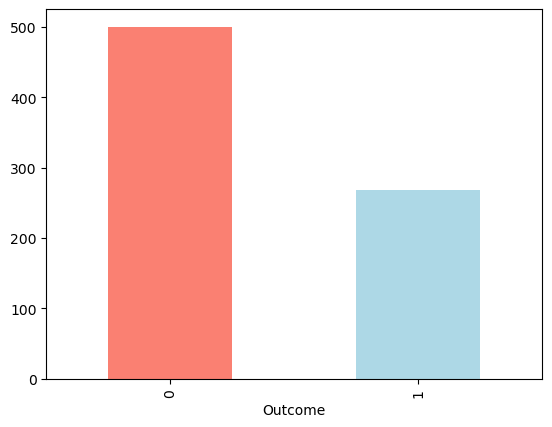

In [12]:
# Plot the value counts with a bar graph
df.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

<h1>Comparing One feature to another and Visualization

Here we see Glucose and Outcome Relationship

In [13]:
df.Glucose.value_counts()

Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64

Comparing Pregnanices and BMI

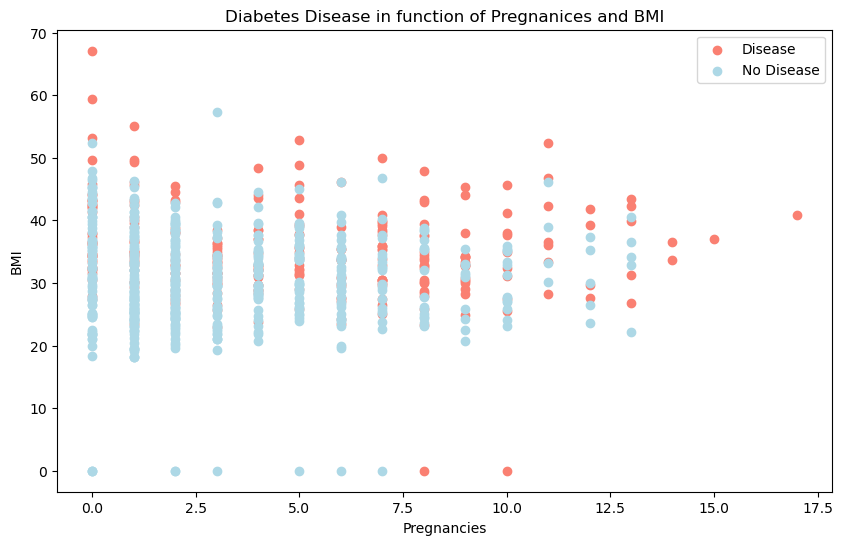

In [14]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.Pregnancies[df.Outcome==1], 
            df.BMI[df.Outcome==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.Pregnancies[df.Outcome==0], 
            df.BMI[df.Outcome==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Diabetes Disease in function of Pregnanices and BMI")
plt.xlabel("Pregnancies")
plt.legend(["Disease", "No Disease"])
plt.ylabel("BMI");

<Axes: ylabel='Frequency'>

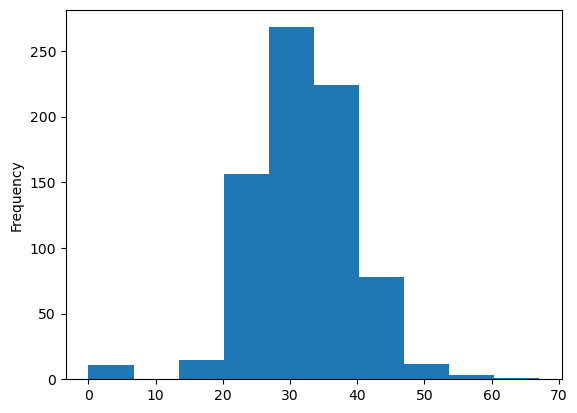

In [15]:
df.BMI.plot.hist()

Comapring Age and Outcome

In [16]:
pd.crosstab(index=df.Age, columns=df.Outcome)

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


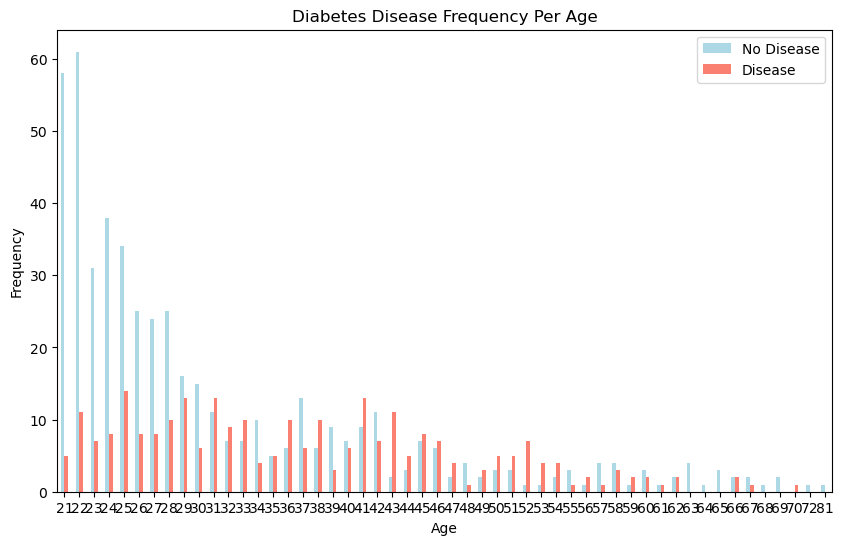

In [17]:
# Create a new crosstab and base plot
pd.crosstab(df.Age, df.Outcome).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Diabetes Disease Frequency Per Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [18]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


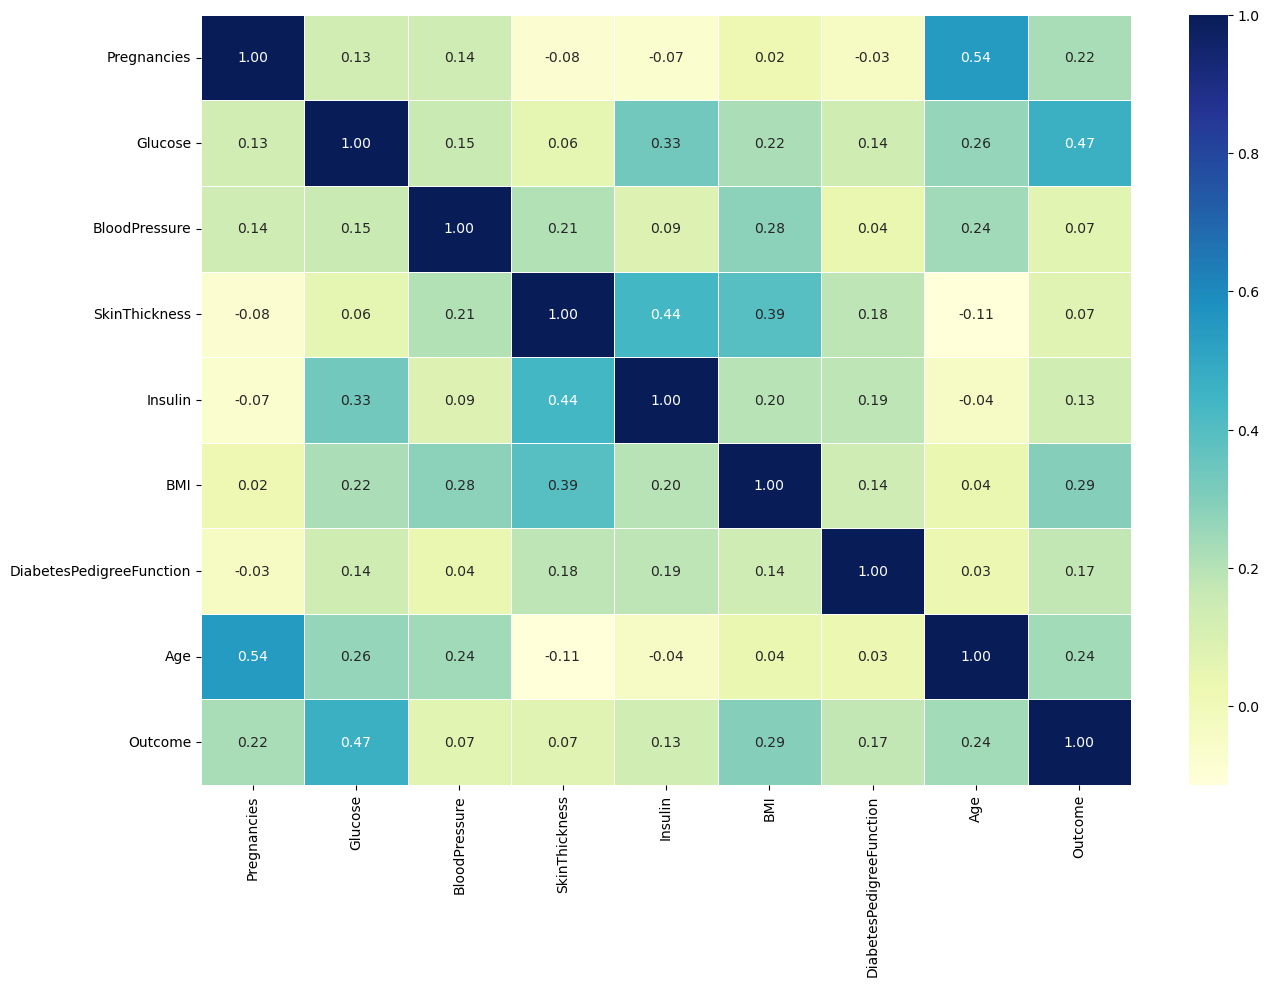

In [19]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

<h1>Model Training</h1>

In [20]:
# Everything except target variable
X = df.drop(labels="Outcome", axis=1)

# Target variable
y = df.Outcome.to_numpy()

In [21]:
# Independent variables (no target column)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
# Targets (in the form of a NumPy array)
y, type(y)

(array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 

Train-Test Split

In [23]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [24]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [25]:
y_train, len(y_train)

(array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

In [26]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [27]:
y_test, len(y_test)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]),
 154)

<h1>Model Selection

In [28]:
# Put models in a dictionary
models = {"Naive Bayes":GaussianNB(),
          "Supoort Vector Machine":svm.SVC(kernel='linear'),
          "Logistic Regression": LogisticRegression(max_iter=100), # Note: if you see a warning about "convergence not reached", you can increase `max_iter` until convergence is reached
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Naive Bayes': 0.7662337662337663,
 'Supoort Vector Machine': 0.7532467532467533,
 'Logistic Regression': 0.7467532467532467,
 'Random Forest': 0.7207792207792207}

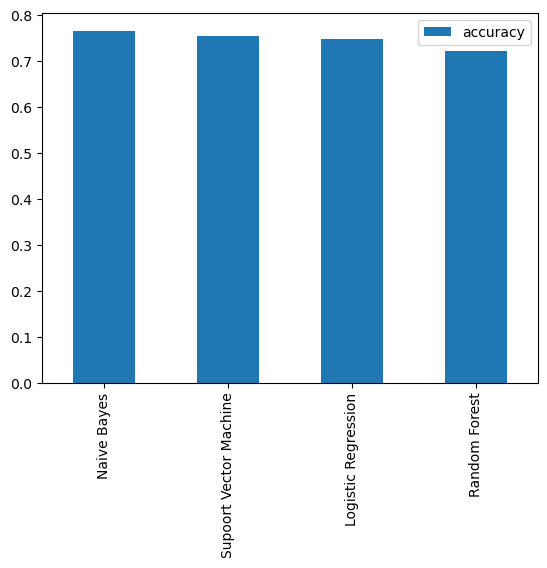

In [30]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

<h1>Hyperparameter Tuning and Cross Validation

Tuning models with RandomizedSearchCV

`RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

In [31]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

#Different NaiveBayes Hyperparameters
naive_grid={"var_smoothing": np.logspace(-9, 0, 10)}

#Different SVM hyperparameters
svm_grid = {
    'kernel': ['linear', 'rbf'],  # only 2 kernels
    'C': [0.1, 1, 10],            # fewer C values
    'gamma': ['scale', 0.01, 0.001]  # simple gamma options
}

For Logistic Regression

In [32]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 2.22 s
Wall time: 2.32 s


In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(4.281332398719396)}

In [34]:
rs_log_reg.score(X_test, y_test)

0.7597402597402597

For Random ForestClassifier RandomizedSearchCV

In [35]:
%%time 

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 3min 51s
Wall time: 4min 5s


In [36]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': np.int64(710),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(3),
 'max_depth': 10}

In [37]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.7467532467532467

For Naive Bayes RandomizedSearchCV

In [38]:
%%time 

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for Naive Bayes
rs_naive = RandomizedSearchCV(GaussianNB(),
                           param_distributions=naive_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_naive.fit(X_train, y_train);

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 688 ms
Wall time: 729 ms


In [39]:
# Find the best parameters
rs_naive.best_params_

{'var_smoothing': np.float64(1e-09)}

In [40]:
# Evaluate the randomized search naive bayes model
rs_naive.score(X_test, y_test)

0.7662337662337663

For SVM RandomizedSearchCV

In [41]:
%%time 

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for SVM
rs_svm = RandomizedSearchCV(svm.SVC(),
                           param_distributions=svm_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_svm.fit(X_train, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: total: 8min 55s
Wall time: 9min 18s


In [42]:
# Find the best parameters
rs_svm.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}

In [43]:
# Evaluate the randomized search svm model
rs_svm.score(X_test, y_test)

0.7532467532467533

Tuning Model with GridSearchCV

In [44]:
%%time

# Different NaiveByaes hyperparameters
naive_grid={"var_smoothing": np.logspace(-9, 0, 10)}

# Setup grid hyperparameter search for LogisticRegression
gs_naive_reg = GridSearchCV(GaussianNB(),
                          param_grid=naive_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_naive_reg.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 312 ms
Wall time: 311 ms


In [45]:
# Check the best parameters
gs_naive_reg.best_params_

{'var_smoothing': np.float64(1e-09)}

In [46]:
# Evaluate the model
gs_naive_reg.score(X_test, y_test)

0.7662337662337663

<h1>Model Evaluation

Making some prediction on test data

In [47]:
# Make preidctions on test data
y_preds = gs_naive_reg.predict(X_test)

In [48]:
y_preds

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

ROC curve And AUC Scores

RoC curve basically means how model perform with true positive to the false positive rate.

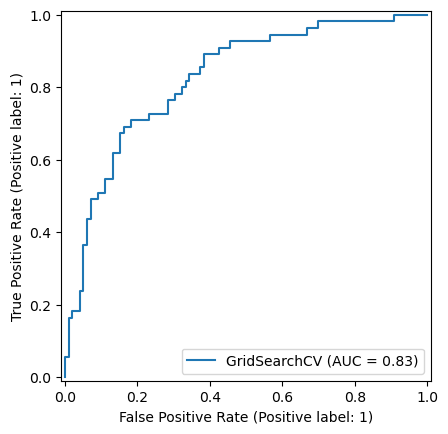

In [50]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_naive_reg, 
                               X=X_test, 
                               y=y_test);

Confusion Matrix

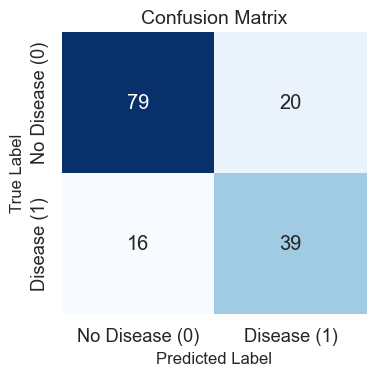

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)

def plot_conf_mat(y_test, y_preds, class_names=["No Disease", "Disease"]):
    """
    Plots a confusion matrix using Seaborn's heatmap() with class names and numbers.
    """
    # Add numbers in brackets to class names
    class_labels = [f"{name} ({i})" for i, name in enumerate(class_names)]
    
    cm = confusion_matrix(y_test, y_preds)
    
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm,
                annot=True, 
                fmt="d",
                cmap="Blues",
                xticklabels=class_labels,
                yticklabels=class_labels,
                cbar=False,
                ax=ax)
    
    ax.set_xlabel("Predicted Label", fontsize=12)
    ax.set_ylabel("True Label", fontsize=12)
    ax.set_title("Confusion Matrix", fontsize=14)
    plt.tight_layout()
    plt.show()

# Example call
plot_conf_mat(y_test, y_preds, class_names=["No Disease", "Disease"])


Classification Report

In [52]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [53]:
# Check best hyperparameters
gs_naive_reg.best_params_

{'var_smoothing': np.float64(1e-09)}

In [54]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = GaussianNB(var_smoothing=1e-9)

In [55]:
%%time

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

CPU times: total: 46.9 ms
Wall time: 40.3 ms


array([0.75324675, 0.72727273, 0.74675325, 0.78431373, 0.74509804])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.7513368983957219)

In [57]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

np.float64(0.6620664087685364)

In [58]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

np.float64(0.5859538784067087)

In [59]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

np.float64(0.6214194910927504)

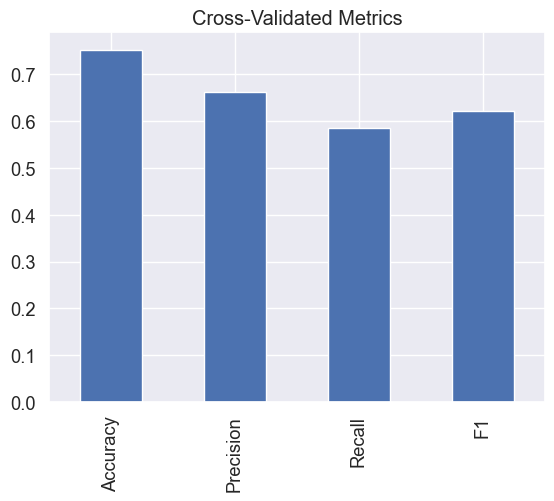

In [60]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

<h1>Feature Importance</h1>

In [61]:
# Fit an instance of NaiveBayes (taken from above)
clf.fit(X_train, y_train);

In [62]:
# Check coef_
clf.theta_


array([[  3.24189526, 110.21446384,  68.30922693,  19.74812968,
         72.25436409,  30.25660848,   0.43125436,  30.55610973],
       [  4.68544601, 140.88732394,  71.49765258,  21.62441315,
         98.72769953,  35.2342723 ,   0.5405446 ,  37.33333333]])

In [63]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.theta_[0])))
features_dict

{'Pregnancies': np.float64(3.2418952618453867),
 'Glucose': np.float64(110.214463840399),
 'BloodPressure': np.float64(68.30922693266832),
 'SkinThickness': np.float64(19.748129675810475),
 'Insulin': np.float64(72.25436408977556),
 'BMI': np.float64(30.256608478802992),
 'DiabetesPedigreeFunction': np.float64(0.4312543640897757),
 'Age': np.float64(30.556109725685786)}

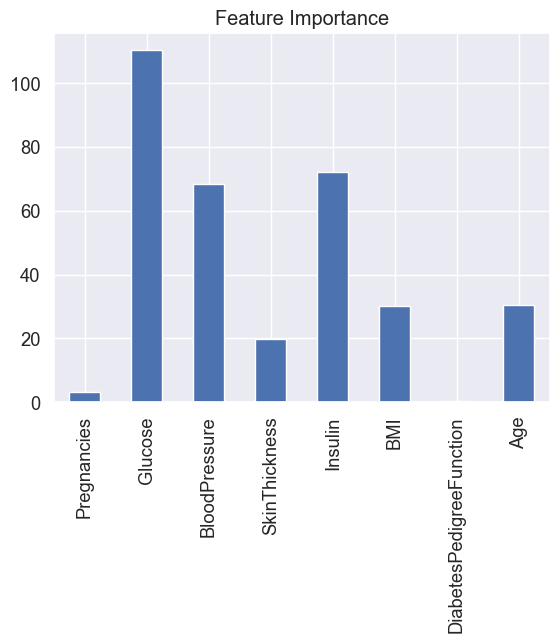

In [64]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [65]:
import joblib

# Assuming gs_naive_reg is your GridSearchCV object for Naive Bayes
best_naive_bayes_model = gs_naive_reg.best_estimator_

# Save the best Naive Bayes model to a .pkl file
joblib.dump(best_naive_bayes_model, 'best_naive_bayes_model.pkl')


['best_naive_bayes_model.pkl']